  0%|          | 0/6 [00:00<?, ?it/s]

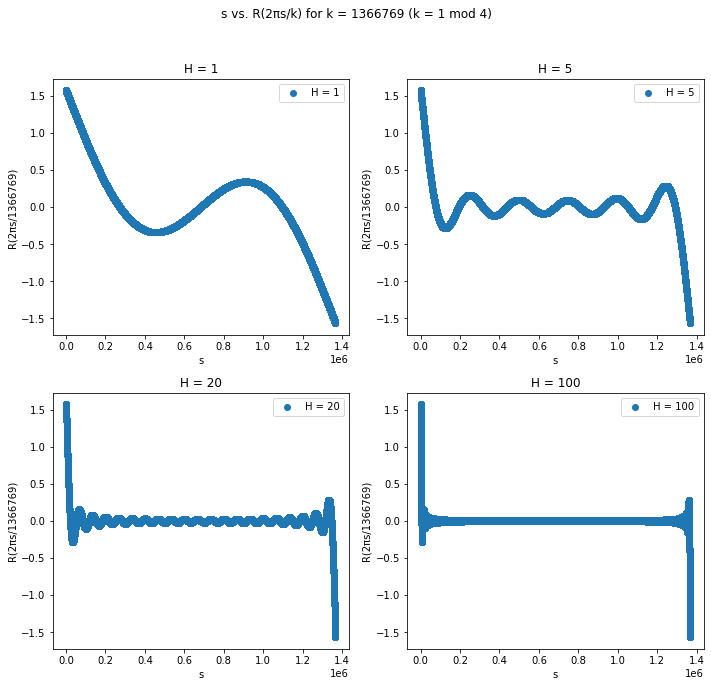

 17%|█▋        | 1/6 [00:24<02:04, 24.91s/it]

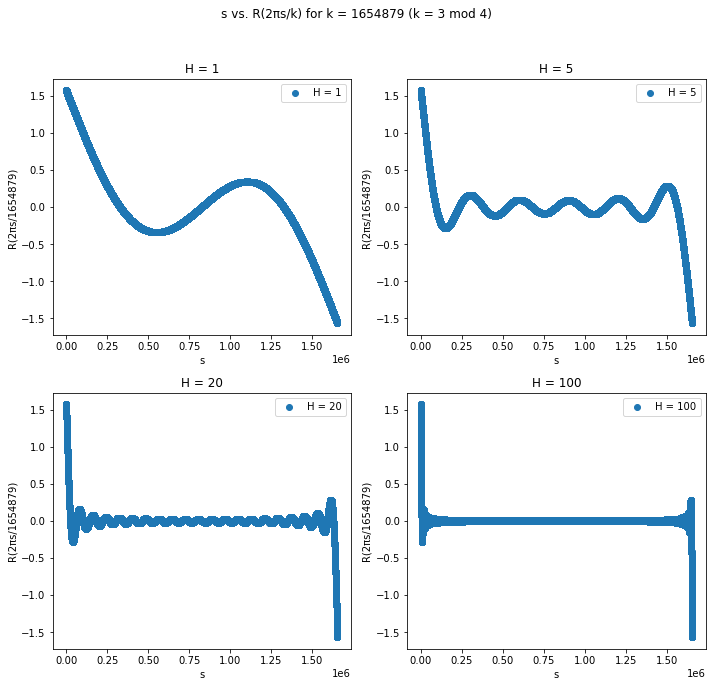

 33%|███▎      | 2/6 [00:54<01:50, 27.62s/it]

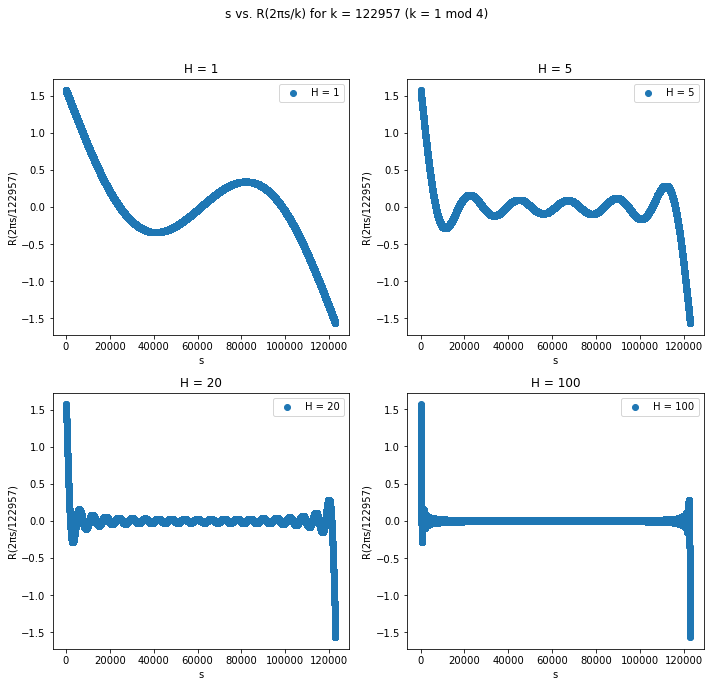

 50%|█████     | 3/6 [00:57<00:48, 16.22s/it]

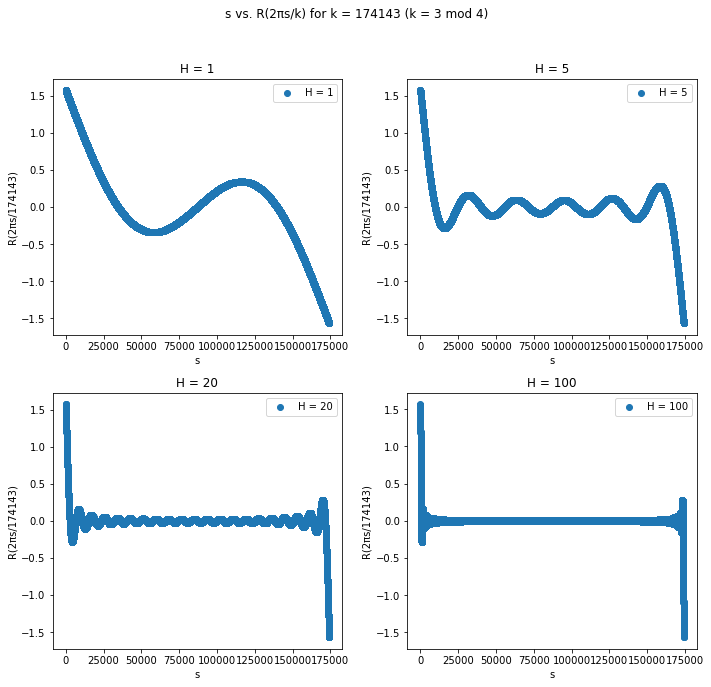

 67%|██████▋   | 4/6 [01:00<00:22, 11.04s/it]

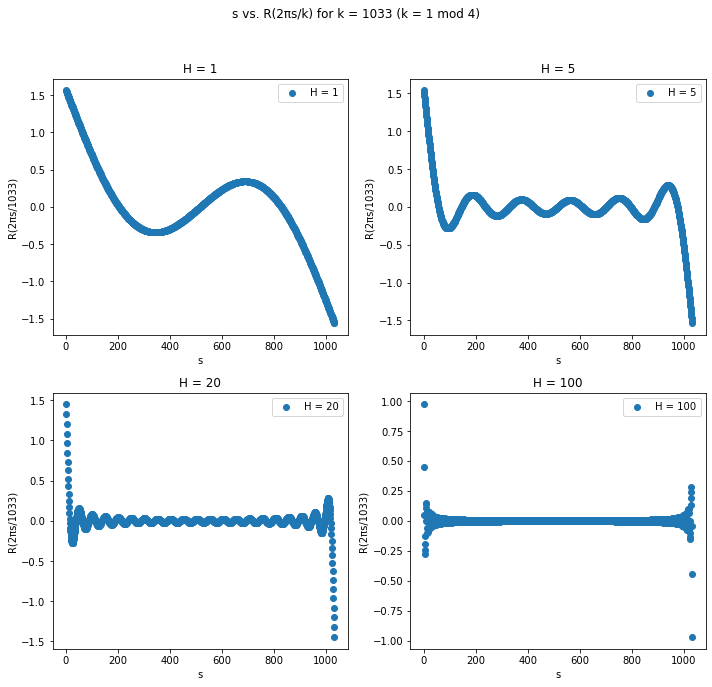

 83%|████████▎ | 5/6 [01:00<00:07,  7.16s/it]

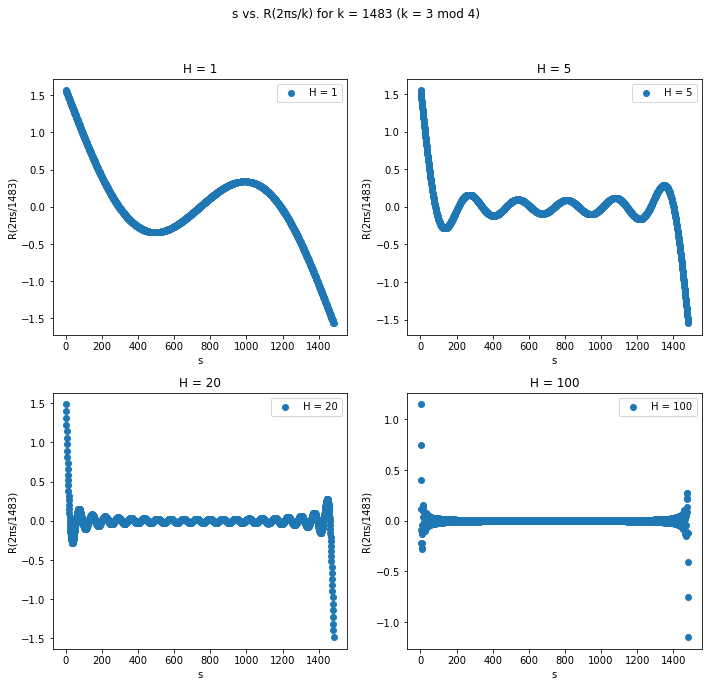

100%|██████████| 6/6 [01:00<00:00, 10.12s/it]


In [4]:
import os 
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import math
from tqdm import tqdm
from scipy.special import comb

import time
import seaborn as sns

PLOT_PATH = os.path.join("/Users", "jcheigh", "Thesis", "plots")

primes = [1366769, 1654879, 122957, 174143, 1033, 1483]
H_vals = [1, 5, 20, 100]

def R(x, H=30):
    # x is a vector 
    y = x % (2 * np.pi)
    y[y == np.pi] = 0  # Handle the special case where y equals pi

    # Calculating R for all y values
    n = np.arange(1, H + 1)
    sin_term = np.sin(np.outer(y, n)) / n
    return (np.pi - y) / 2 - np.sum(sin_term, axis=1)

def create_1i(primes, H_vals, error=False):
    for k in tqdm(primes):
        fig, axs = plt.subplots(2, 2, figsize=(10, 10))
        title = f's vs. R(2πs/k) for k = {k} (k = {k%4} mod 4)'
        fig.suptitle(title)

        # Compute s values and corresponding R values for each H
        s_values = np.arange(1, k)
        x_values = 2 * np.pi * s_values / k

        for i, H in enumerate(H_vals):
            R_values = R(x_values, H)
            # Plotting
            ax = axs[i // 2, i % 2]
            ax.scatter(s_values, R_values, label=f'H = {H}')
            if error:
                error_values = k / (2 * H * s_values)
                ax.plot(s_values, error_values, 'r--', label='Error +')
                ax.plot(s_values, -error_values, 'r--', label='Error -')
                
            ax.set_title(f'H = {H}')
            ax.set_xlabel('s')
            ax.set_ylabel(f'R(2πs/{k})')
            ax.legend()

        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()
        plt.close(fig)
        
create_1i(primes, H_vals)

  0%|          | 0/6 [00:00<?, ?it/s]

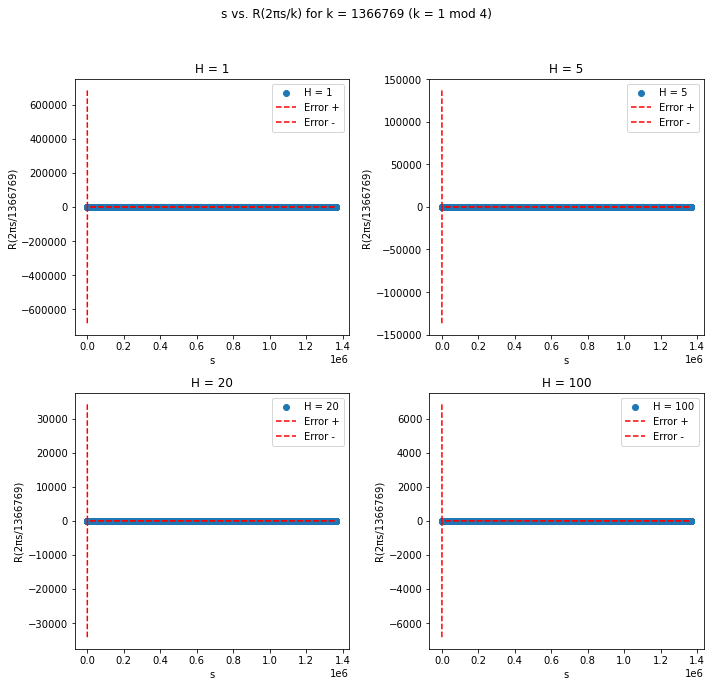

 17%|█▋        | 1/6 [00:28<02:24, 28.92s/it]

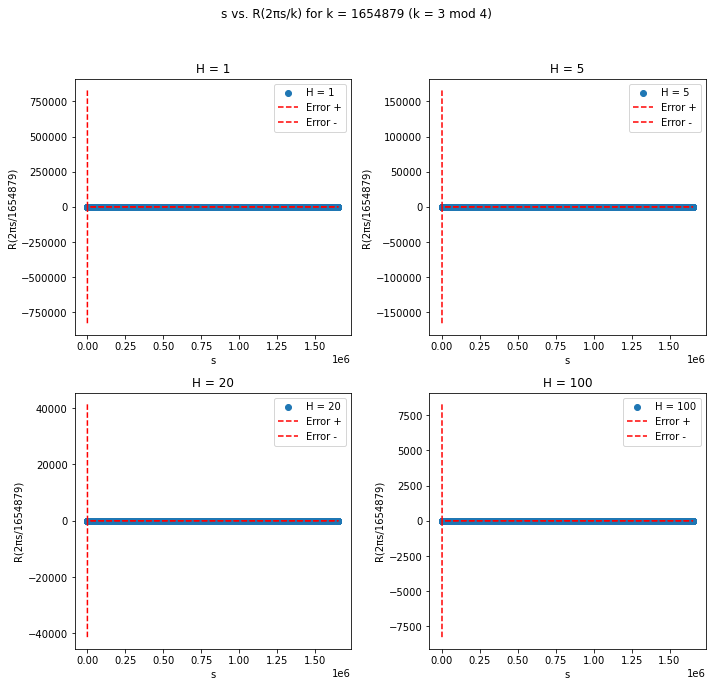

 33%|███▎      | 2/6 [01:04<02:11, 32.92s/it]

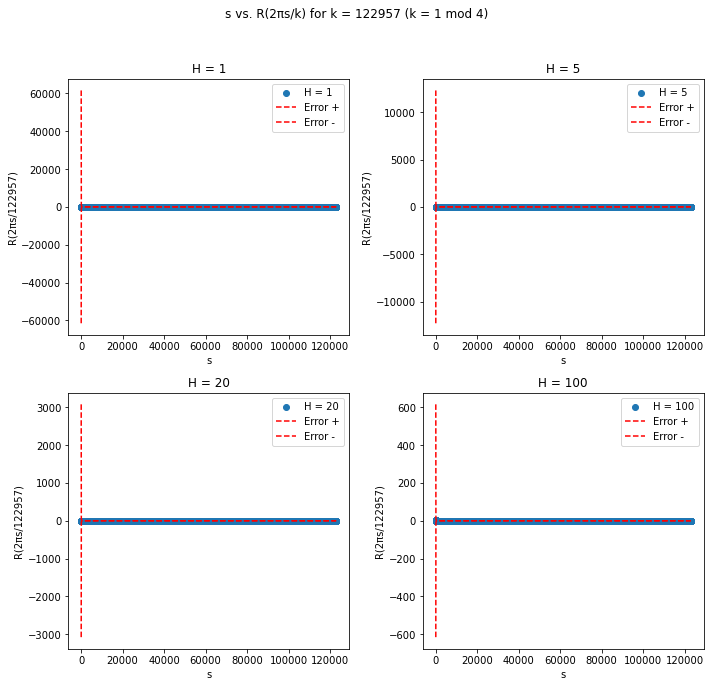

 50%|█████     | 3/6 [01:07<00:57, 19.08s/it]

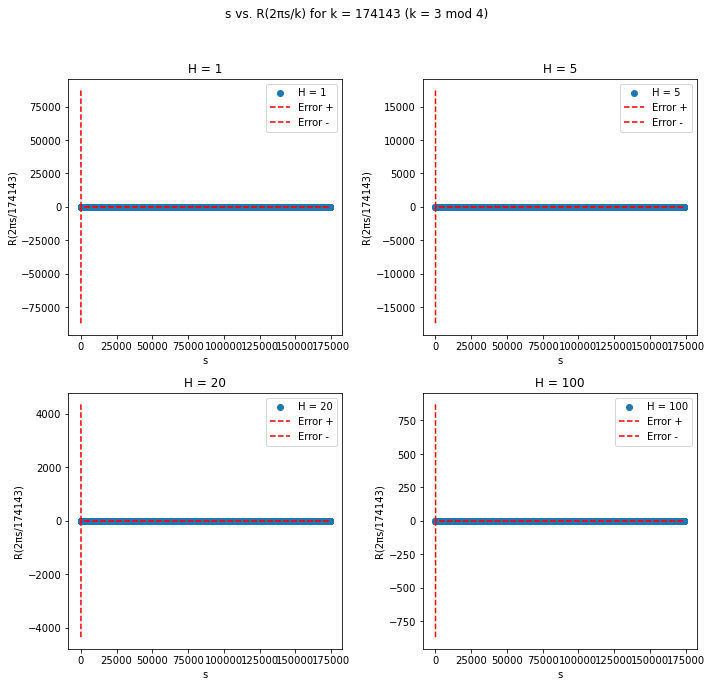

 67%|██████▋   | 4/6 [01:10<00:25, 12.99s/it]

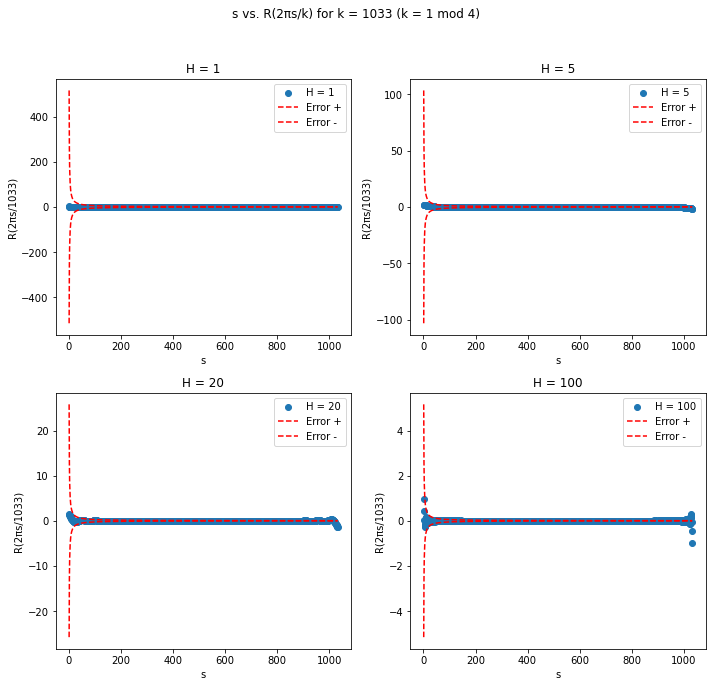

 83%|████████▎ | 5/6 [01:11<00:08,  8.41s/it]

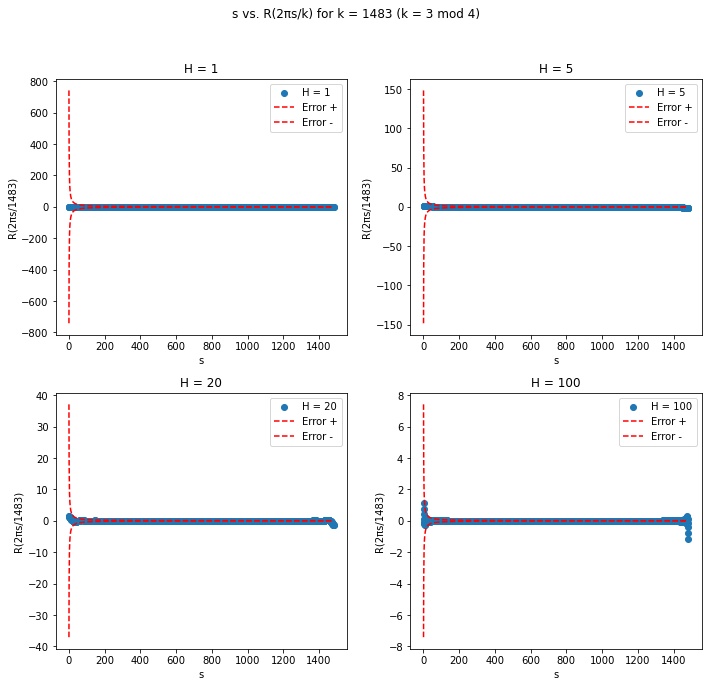

100%|██████████| 6/6 [01:11<00:00, 11.92s/it]


In [5]:
create_1i(primes, H_vals, error=True)

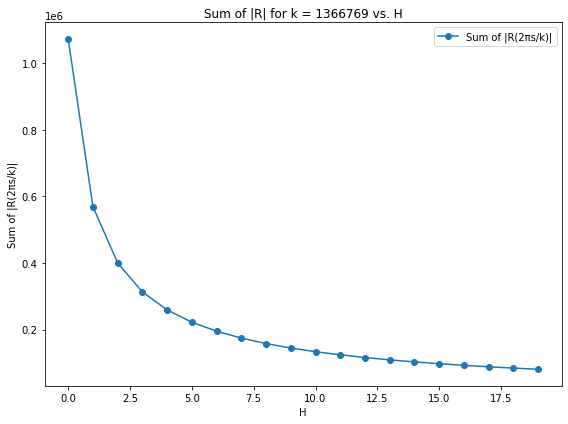

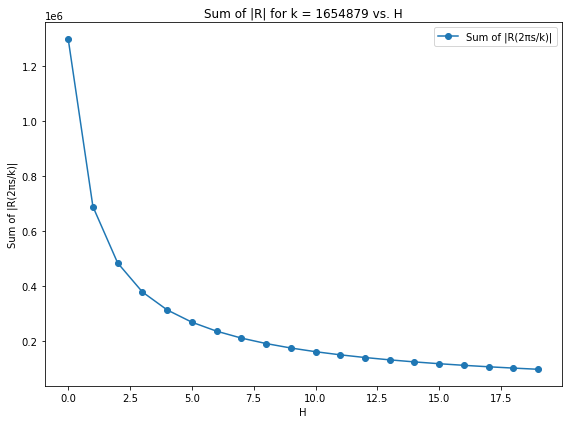

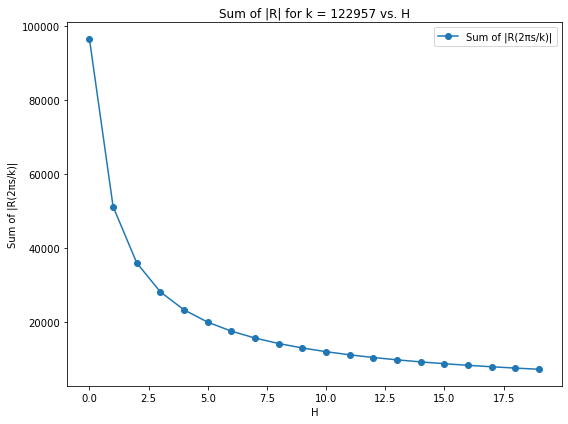

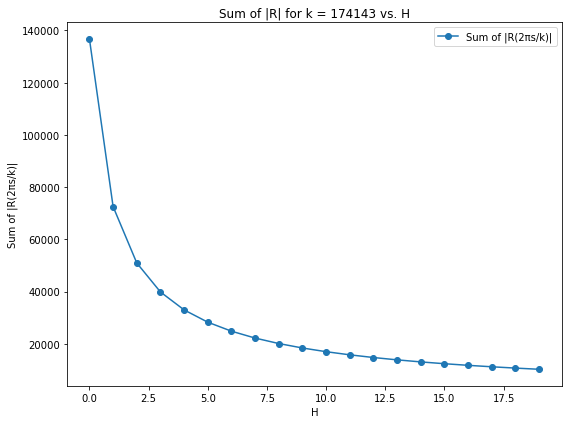

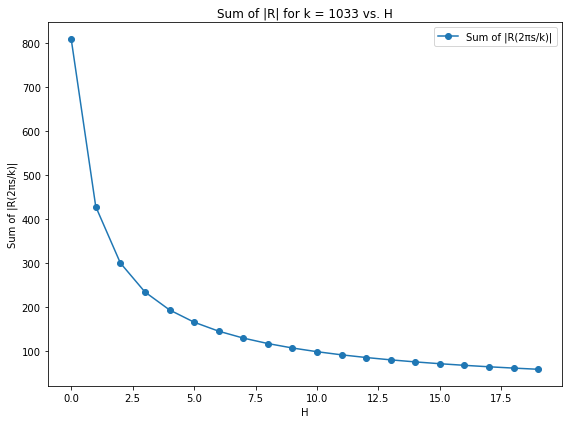

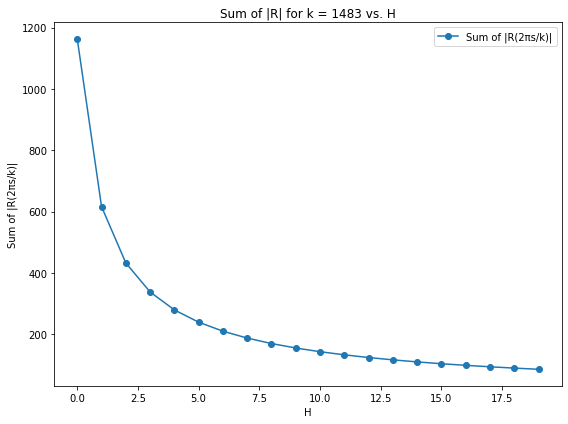

In [6]:
def r_sum(k, H_vals):
    """
    Computes the sum of R(2pi * s / k) and the sum of the absolute value of R(2pi * s / k)
    for different H values in a vectorized manner.

    :param k: The prime number.
    :param H_vals: A list of H values.
    :return: Two arrays - sum of R values and sum of absolute R values for each H.
    """
    s_values = np.arange(1, k)
    x_values = 2 * np.pi * s_values / k

    sum_abs_R = []
    for H in H_vals:
        R_values = R(x_values, H)
        sum_abs_R.append(np.sum(np.abs(R_values)))

    return np.array(sum_abs_R)

def create_2i(primes, H_vals, error=False):
    H_vals_sorted = sorted(H_vals)

    for k in primes:
        plt.figure(figsize=(8, 6))
        title = f'Sum of |R| for k = {k} vs. H'
        plt.title(title)

        sum_abs_R = r_sum(k, H_vals_sorted)

        # Plot for sum of absolute R values
        plt.plot(H_vals_sorted, sum_abs_R, marker='o', label='Sum of |R(2πs/k)|')
        plt.xlabel('H')
        plt.ylabel('Sum of |R(2πs/k)|')

        if error:
            error = k * np.log(k) / np.array(H_vals_sorted)
            plt.errorbar(H_vals_sorted, sum_abs_R, yerr=error, fmt='o', ecolor='red', capsize=5, label='Error')

        plt.legend()
        plt.tight_layout()
        plt.show()

H_vals = list(range(20))

create_2i(primes, H_vals)

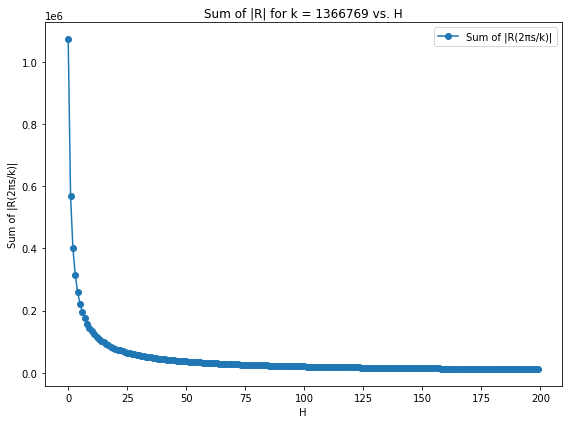

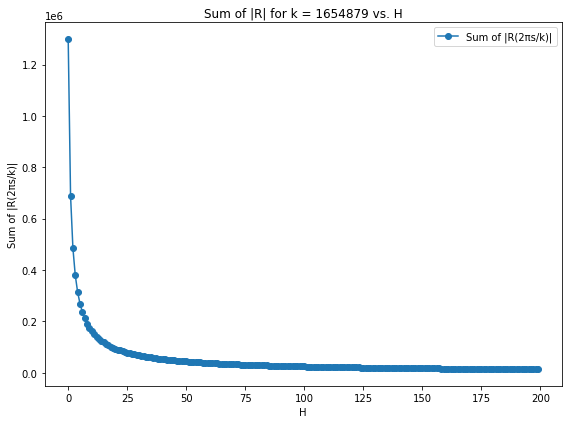

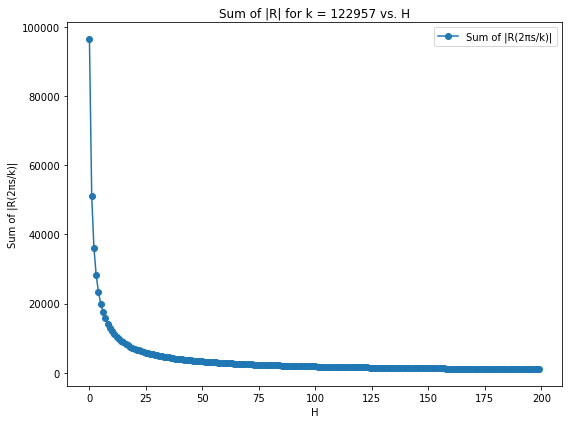

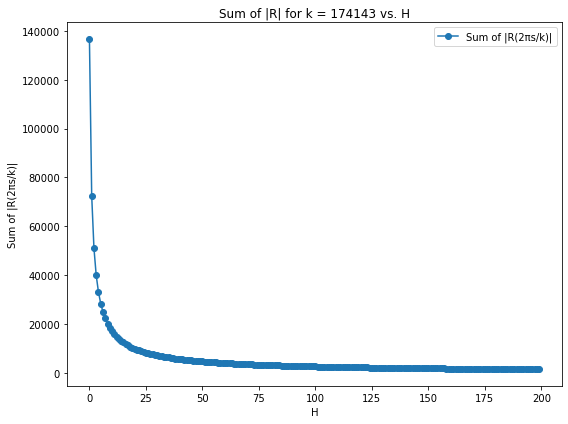

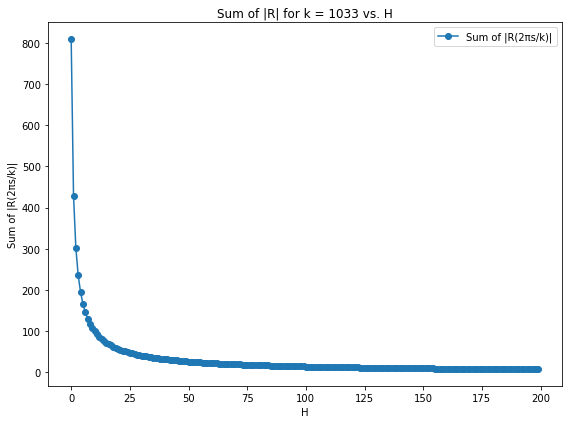

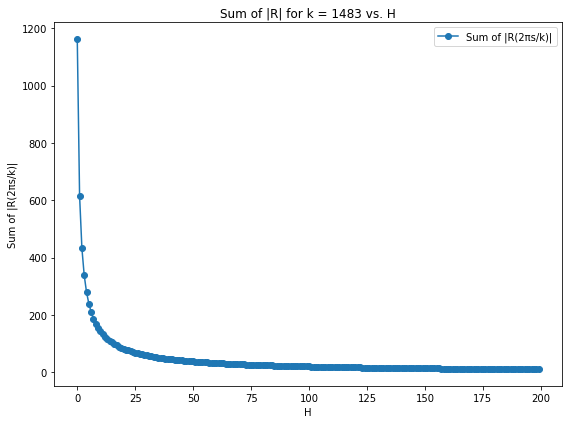

In [7]:
H_vals = list(range(200))

create_2i(primes, H_vals)

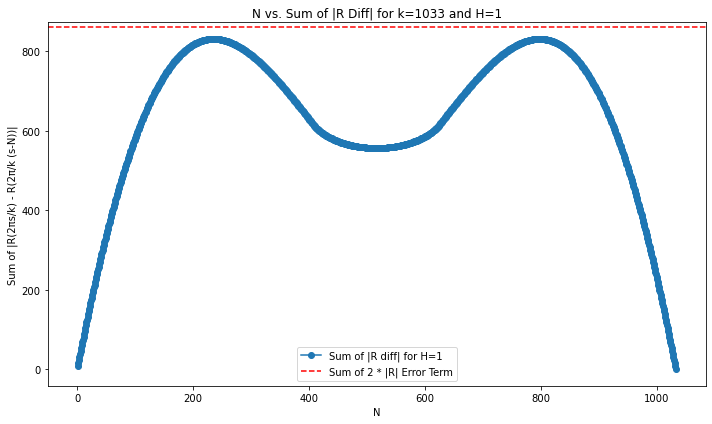

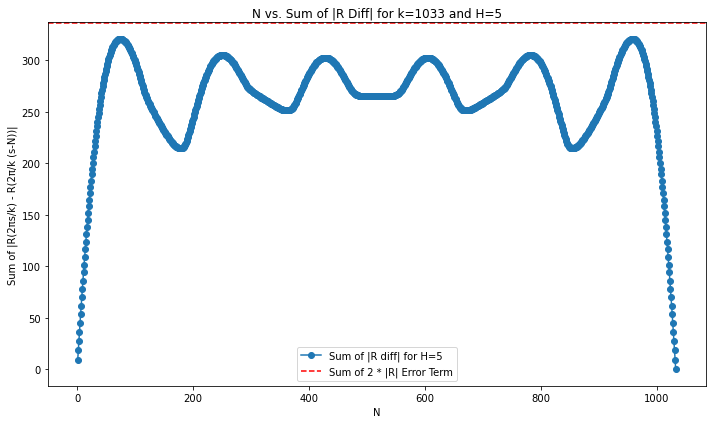

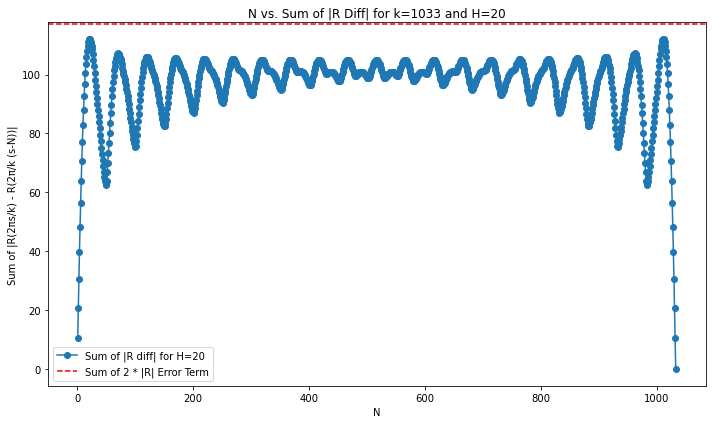

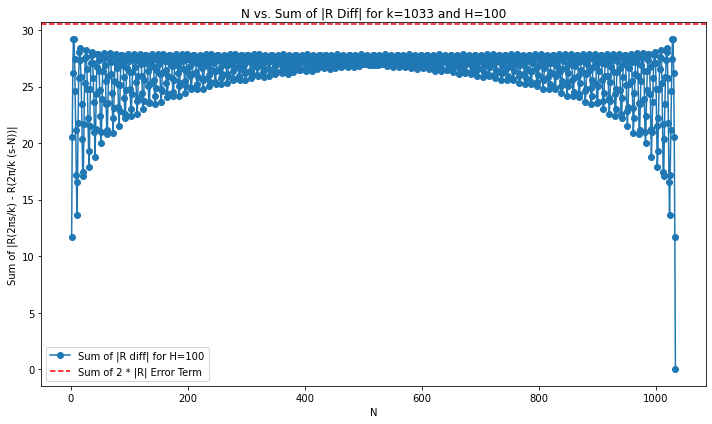

In [12]:
def r_diff_sum(k, H, N):
    """
    Computes the sum of |R(2πs/k) - R(2π/k * (s-N))| for s in range(1, k+1)
    in a vectorized manner for different values of N.

    :param k: The prime number.
    :param H: The value of H.
    :param N: Array of N values.
    :return: Array of sums for each N.
    """
    s_values = np.arange(1, k + 1)
    x_values = 2 * np.pi * s_values / k

    R_values = R(x_values, H)

    sum_diff = []
    for n in N:
        shifted_s_values = np.arange(1, k + 1) - n
        shifted_x_values = 2 * np.pi * shifted_s_values / k
        shifted_R_values = R(shifted_x_values, H)
        sum_diff.append(np.sum(np.abs(R_values - shifted_R_values)))

    return np.array(sum_diff)

def create_3i(k, H_vals):
    for H in H_vals:
        N_values = np.arange(1, k + 1)
        sum_diff = r_diff_sum(k, H, N_values)
        sum_abs_R = np.sum(np.abs(R(2 * np.pi * np.arange(1, k + 1) / k, H)))

        plt.figure(figsize=(10, 6))
        plt.plot(N_values, sum_diff, marker='o', label=f'Sum of |R diff| for H={H}')
        plt.axhline(y=2 * sum_abs_R, color='r', linestyle='--', label='Sum of 2 * |R| Error Term')
        plt.title(f'N vs. Sum of |R Diff| for k={k} and H={H}')
        plt.xlabel('N')
        plt.ylabel('Sum of |R(2πs/k) - R(2π/k (s-N))|')
        plt.legend()
        plt.tight_layout()
        plt.show()

H_vals = [1, 5, 20, 100]

create_3i(1033, H_vals)

In [14]:
create_3i(10,499, H_vals)